<a href="https://colab.research.google.com/github/quynhkylaphan/personal-projects/blob/main/PandasLastFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-time Music Data with Pandas

### Import Modules

In [ ]:
import requests
import pandas as pd

### Function Definitions

In [ ]:
# get data from a URL (json=False) or an API (json=True), return None if call is not successful
def apiRequest(url, options='',json=True):
    try:
        response = requests.get(url, options)
        if not json and response:
            response.encoding = 'utf-8'
            return response.text
        if response.status_code != 200:
            print("Call returned satus code ", response.status_code)
            raise
        jdata = response.json()
        return jdata
    except:
        print("Call was not successful.")
        return None

#### <font color='blue'>Step 1: Proivde your API Key for Last.fm</font>
Use the same API key you had created for your last assignment.</li>


In [ ]:
lastFMapikey = '703c98b6006f5fee6cc028eeab4e2d57'

#### <font color='blue'>Step 2: Make an API Call</font>
<ol type="i">
<li>Review the 3 variables listed to make an API request to get data about the top albums of all time in a given genre of music.
<li> Adjust this code so that your request will get 200 albums. This may require you to look at the documentation for the LastFM API.</li>
<li> Personalize this request and choose a music genre that interests you (pop, country, hip hop, jazz, metal, indie, female vocalist, singer-songwriter, chillout, rap ....)
<li> Make the request using the provided apiRequest() and see that you get data. Save that data to a variable.
    </ol>

In [ ]:
serverURL = 'http://ws.audioscrobbler.com'
endpoint = '/2.0/'
opts1 = {'api_key': lastFMapikey,
        'method': "tag.gettopalbums",
        'format': 'json',
        'tag' : "pop",
        'limit': 200
       }

data1 = apiRequest(serverURL + endpoint,opts1)
data1.items()

dict_items([('albums', {'album': [{'name': 'Golden', 'mbid': '', 'url': 'https://www.last.fm/music/Jung+Kook', 'artist': {'name': 'Jung Kook', 'mbid': '', 'url': 'https://www.last.fm/music/Jung+Kook'}, 'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/b6e6b6af5aa815e18e3a149464d0fe41.png', 'size': 'small'}, {'#text': 'https://lastfm.freetls.fastly.net/i/u/64s/b6e6b6af5aa815e18e3a149464d0fe41.png', 'size': 'medium'}, {'#text': 'https://lastfm.freetls.fastly.net/i/u/174s/b6e6b6af5aa815e18e3a149464d0fe41.png', 'size': 'large'}, {'#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/b6e6b6af5aa815e18e3a149464d0fe41.png', 'size': 'extralarge'}], '@attr': {'rank': '1'}}, {'name': 'Thank U, Next', 'mbid': '', 'url': 'https://www.last.fm/music/Ariana+Grande', 'artist': {'name': 'Ariana Grande', 'mbid': 'f4fdbb4c-e4b7-47a0-b83b-d91bbfcfa387', 'url': 'https://www.last.fm/music/Ariana+Grande'}, 'image': [{'#text': 'https://lastfm.freetls.fastly.net/i/u/34s/bd58c238fe5df2db0409fcf36

#### <font color='blue'>Step 3: Load data into a Pandas Dataframe</font>
<ol>
<li>Load all Album data into a Pandas dataframe
<li>Clean up the dataframe so that only the album name, artist and rank are included.</li>
    <li>Show the dataframe's information that details the total number of rows in the dataframe as well as the column names and data type.</li>
    <li>List the first 15 entries in the dataframe.</li>
</ol>

In [ ]:
album_data = data1['albums']['album']
df = pd.DataFrame(album_data)
df['rank'] = df['@attr'].apply(lambda r: r.get('rank'))
df = df[['name','artist','rank']]

In [ ]:
album_data = data1['albums']['album']
df1 = pd.DataFrame(album_data)
df1['Album'] = df1.name
df1['Artist'] = df1.artist.apply(lambda r: r.get('name'))
df1['Rank'] = df1['@attr'].apply(lambda r: r.get('rank'))
df1 = df1[['Album','Artist','Rank']]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Album   200 non-null    object
 1   Artist  200 non-null    object
 2   Rank    200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [ ]:
df1.head(15)

,Album,Artist,Rank
0,Golden,Jung Kook,1
1,"Thank U, Next",Ariana Grande,2
2,Sweetener,Ariana Grande,3
3,1989 (Deluxe),Taylor Swift,4
4,Dangerous Woman,Ariana Grande,5
5,Anti (Deluxe),Rihanna,6
6,Butter / Permission to Dance,BTS,7
7,The Tortured Poets Department,Taylor Swift,8
8,Teenage Dream,Katy Perry,9
9,Doo-Wops & Hooligans,Bruno Mars,10


#### <font color='blue'>Step 4: Plot the top Artists in the US</font>
This requires using the same URL as above and the same api key & json format option but now use these options:
<li>method=geo.gettopartists</li>
<li>country=united states (or any country name you wish)</li>
<li>format=json</li>
<li>api_key= <i>your api key used above</i></li>
<br>
<ol>
<li>Load all the artist data into a Pandas dataframe.</li>
<li>Plot the top 10 artists along with the number of listeners. (HINT: set kind='barh' for best results)</li>
</ol><br>

In [ ]:
opts2 = {'api_key': lastFMapikey,
        'method': "geo.gettopartists",
        'country': 'united states',
        'format': 'json',
        'tag' : "pop"
       }

data2 = apiRequest(serverURL + endpoint, opts2)
top_artists = data2['topartists']['artist']
df2 = pd.DataFrame(top_artists)

<Axes: ylabel='name'>

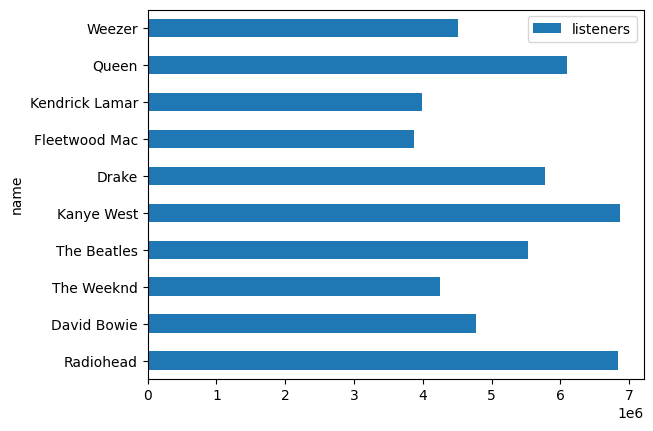

In [ ]:
df2['listeners'] = pd.to_numeric(df2['listeners'], errors='coerce')
df2[0:10].plot(x='name',y='listeners', kind='barh')

#### <font color='blue'>Step 5: Get Top Tracks for an Artist</font>
Use the documentation found on <b>https://www.last.fm/api/show/artist.getTopTracks</b> and determine how to make a request to find out the top tracks for a specific artist.

<ol>
    <li>Prompt the user for their favorite artist.</li>
    <li>Retrieve data from the API for this artist (up to 100 tracks).</li>
    <li>If the call was successfull, load the list of artist tracks into a Pandas dataframe.</li>
    <li>Keep only the columns containing the track name and track rank. Note that rank will need more work to get it into a more proper state - we will do that in class.</i>
    <li>List the first 10 tracks sorted alphabetically.</li>
  </ol><br>

In [ ]:
artist = input('Enter the name of your favorite artist: ')

opts3 = {'api_key': lastFMapikey,
        'method': "artist.gettoptracks",
        'artist': artist,
        'format': 'json',
         'limit': 100
       }

data3 = apiRequest(serverURL + endpoint, opts3)

if 'toptracks' not in data3 or 'track' not in data3['toptracks']:
  print('Artist not found.')
else:
  top_tracks = data3['toptracks']['track']
  df3 = pd.DataFrame(top_tracks)
  df3['rank'] = df3['@attr'].apply(lambda r: r.get('rank'))
  df3 = df3[['name','rank']]

  print(df3.head(10).sort_values(by='name',ascending=True))

Enter the name of your favorite artist: bruno mars
                   name rank
9             24K Magic   10
3               Grenade    4
1  Just the Way You Are    2
8   Leave The Door Open    9
0  Locked Out of Heaven    1
7   Talking to the Moon    8
4    That's What I Like    5
6         The Lazy Song    7
5              Treasure    6
2   When I Was Your Man    3
